In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


EDA

In [ ]:
flight_dataset = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/flight_price.csv")
display(flight_dataset.info())
flight_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class_airline     300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


None

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class_airline,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
flight_dataset = flight_dataset.iloc[:,1:]

In [ ]:
flight_dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class_airline,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**EDA**

<ipython-input-5-bb7ca4e20319>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((8,2), (0,0), colspan=2)
<ipython-input-5-bb7ca4e20319>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((8,2), (1,0))
<ipython-input-5-bb7ca4e20319>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean)
<ipython-input-5-bb7ca4e20319>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((8,2), (1,1))
<ipython-input-5-bb7ca4e20319>:9: MatplotlibDeprecationWarning: 

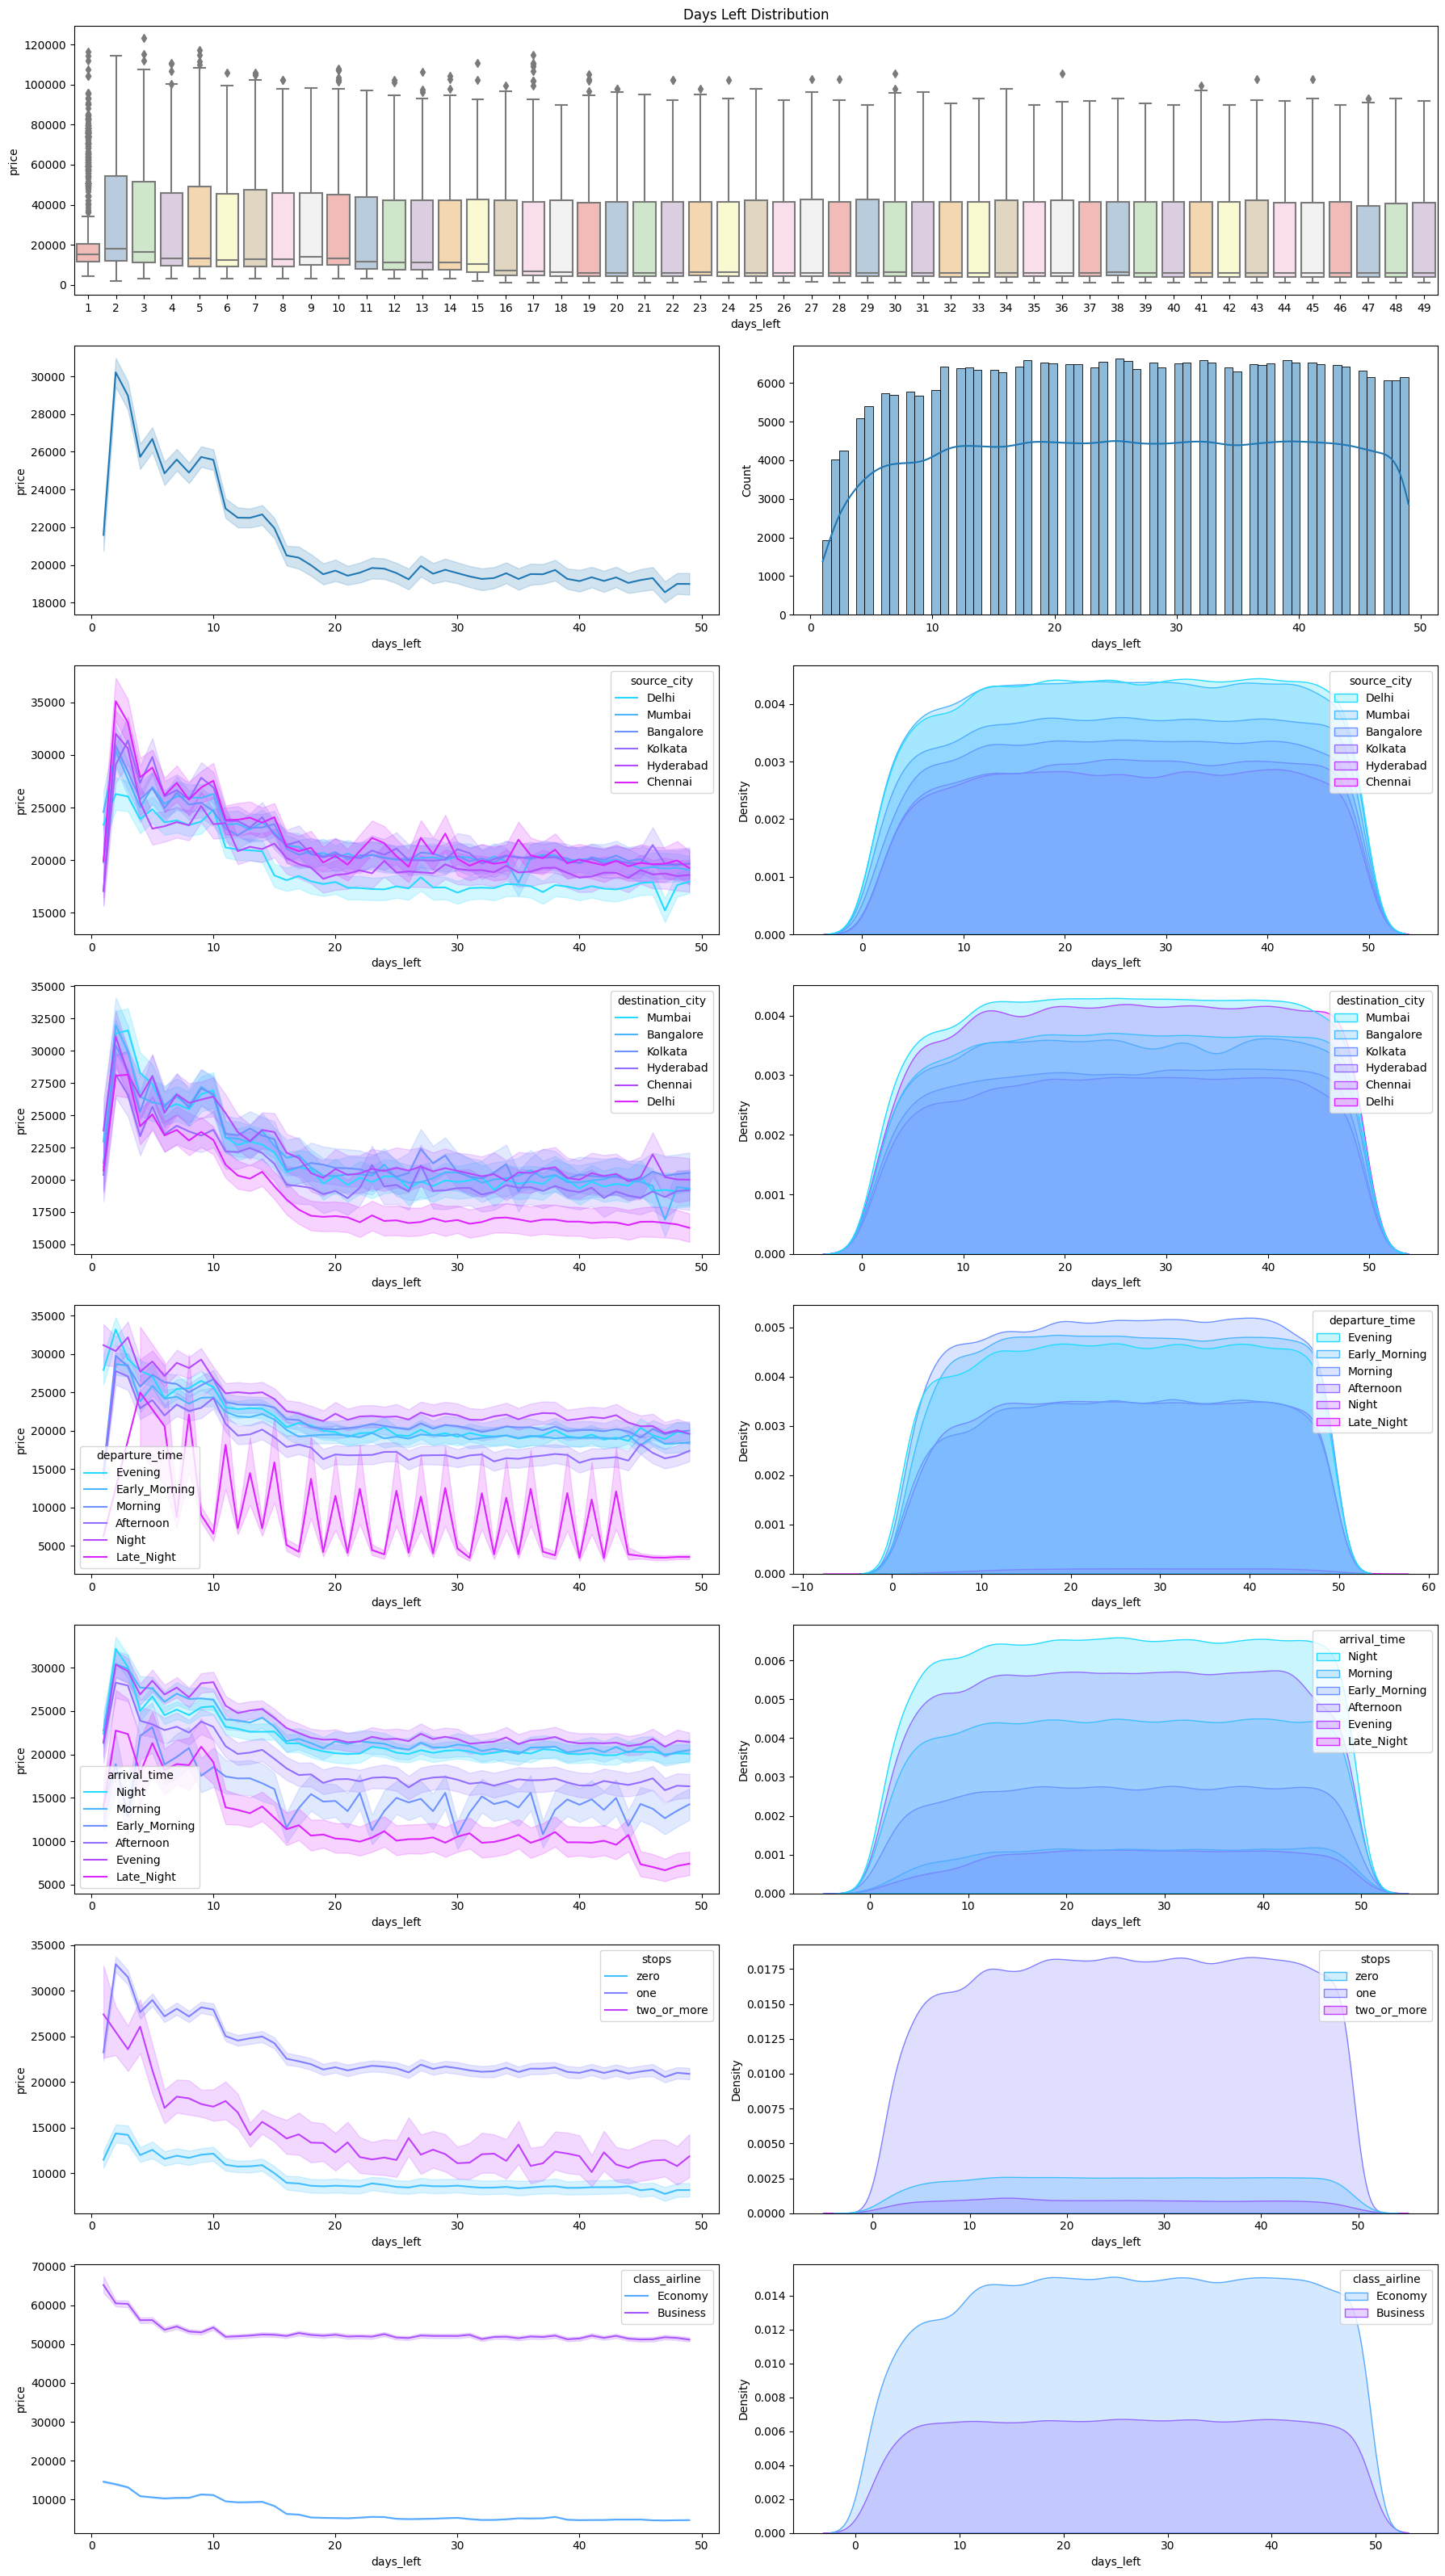

In [ ]:
f, ax = plt.subplots(8, 2, figsize=(18,32))
plt.subplot2grid((8,2), (0,0), colspan=2)
plt.title('Days Left Distribution')
sns.boxplot(x='days_left', y='price', data=flight_dataset, palette='Pastel1')
plt.subplot2grid((8,2), (1,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean)
plt.subplot2grid((8,2), (1,1))
sns.histplot(x='days_left', data=flight_dataset, kde=True)
plt.subplot2grid((8,2), (2,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='source_city')
plt.subplot2grid((8,2), (2,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='source_city')
plt.subplot2grid((8,2), (3,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='destination_city')
plt.subplot2grid((8,2), (3,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='destination_city')
plt.subplot2grid((8,2), (4,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='departure_time')
plt.subplot2grid((8,2), (4,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='departure_time')
plt.subplot2grid((8,2), (5,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='arrival_time')
plt.subplot2grid((8,2), (5,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='arrival_time')
plt.subplot2grid((8,2), (6,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='stops')
plt.subplot2grid((8,2), (6,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='stops')
plt.subplot2grid((8,2), (7,0))
sns.lineplot(x='days_left', y='price', data=flight_dataset, palette='cool', estimator=np.mean, hue='class_airline')
plt.subplot2grid((8,2), (7,1))
sns.kdeplot(x='days_left', data=flight_dataset, palette='cool', shade=True, hue='class_airline')
plt.tight_layout()


**Data Preprocessing**

In [ ]:
## data preprocessing
flight_dataset_new = flight_dataset.copy()


columns = flight_dataset_new.select_dtypes(include=['object']).columns.to_list()


label_encoding = LabelEncoder()


#encode the data into a label
for i in columns:
 flight_dataset_new[i] = label_encoding.fit_transform(flight_dataset_new[i])


In [ ]:
flight_dataset_new.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class_airline,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


Modelling

In [ ]:
# train test split
X = flight_dataset_new.drop(['price'], axis=1)
y = flight_dataset_new['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
modelLinear = ['Linear', LinearRegression()]
modelGradientBoosting = ['Gradient Boosting', GradientBoostingRegressor()]
modelExtraTrees = ['Extra Trees', ExtraTreesRegressor()]
modelAdaBoost = ['Ada Boost', AdaBoostRegressor()]
modelDecisionTree = ['Decision Tree', DecisionTreeRegressor()]

In [ ]:
def modelEvaluation(xTrain, yTrain, xTest, yTest, mdl):
 mdl[1].fit(xTrain, yTrain)
 y_pred = mdl[1].predict(xTest)
 mae = metrics.mean_absolute_error(yTest, y_pred)
 rmse = np.sqrt(metrics.mean_squared_error(yTest, y_pred))
 r2Score = metrics.r2_score(yTest, y_pred)
 return pd.DataFrame([[mdl[0],mae,rmse,r2Score]], columns=['model','mae','rmse','r2_score'])

In [ ]:
modelLinear_ = modelEvaluation(X_train,y_train,X_test,y_test,modelLinear)
modelGradientBoosting_ = modelEvaluation(X_train,y_train,X_test,y_test,modelGradientBoosting)
modelExtraTrees_ = modelEvaluation(X_train,y_train,X_test,y_test,modelExtraTrees)
modelAdaBoost_ = modelEvaluation(X_train,y_train,X_test,y_test,modelAdaBoost)
modelDecisionTree_ = modelEvaluation(X_train,y_train,X_test,y_test,modelDecisionTree)


compareModel = pd.concat([modelLinear_, modelGradientBoosting_,
                          modelExtraTrees_, modelAdaBoost_,
                          modelDecisionTree_]).reset_index(drop=True)
compareModel.style.background_gradient(axis=0, cmap='Greens', subset='r2_score')

,model,mae,rmse,r2_score
0,Linear,4621.759007,6967.121441,0.905262
1,Gradient Boosting,2783.315720,4626.469768,0.958225
2,Extra Trees,893.533800,2412.188481,0.988644
3,Ada Boost,4148.989677,6309.502309,0.922302
4,Decision Tree,876.338839,2885.920440,0.983745


In [ ]:
extra_tree = ExtraTreesRegressor()
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
import pickle
pickle.dump(extra_tree, open('extra_trees_mdl.pkl','wb'))

Deployment

In [ ]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=3b7f135629e1ef14614aadfa9b2b674d953247493c93cc356b36730f9d31b818
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/', methods=['GET'])
def index():
 return jsonify({"Usia":30})

if __name__ == "__main__":
 app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag

In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime


app = Flask(__name__)
run_with_ngrok(app)


@app.route('/', methods=['GET'])
def index():
 return jsonify({"Usia":35})


@app.route('/predict', methods=['GET'])
def result():
 df = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/flight_price.csv")
 data = request.json
 df1 = pd.DataFrame(data, index=[0])


 label_airline = LabelEncoder()
 label_flight = LabelEncoder()
 label_source_city = LabelEncoder()
 label_departure_time = LabelEncoder()
 label_stops = LabelEncoder()
 label_arrival_time = LabelEncoder()
 label_destination_city = LabelEncoder()
 label_class_airline = LabelEncoder()


 df.airline = label_airline.fit_transform(df.airline)
 df.flight = label_flight.fit_transform(df.flight)
 df.source_city = label_source_city.fit_transform(df.source_city)
 df.departure_time = label_departure_time.fit_transform(df.departure_time)
 df.stops = label_stops.fit_transform(df.stops)
 df.arrival_time = label_arrival_time.fit_transform(df.arrival_time)
 df.destination_city = label_destination_city.fit_transform(df.destination_city)
 df.class_airline = label_class_airline.fit_transform(df.class_airline)


 # data yang diinput oleh user
 df1.airline = label_airline.transform(df1.airline)
 df1.flight = label_flight.transform(df1.flight)
 df1.source_city = label_source_city.transform(df1.source_city)
 df1.departure_time = label_departure_time.transform(df1.departure_time)
 df1.stops = label_stops.transform(df1.stops)
 df1.arrival_time = label_arrival_time.transform(df1.arrival_time)
 df1.destination_city = label_destination_city.transform(df1.destination_city)
 df1.class_airline = label_class_airline.transform(df1.class_airline)


 with open('/content/extra_trees_mdl.pkl', 'rb') as file:
   extra_tree = pickle.load(file)


 prediction = extra_tree.predict(df1)
 return jsonify({"Status":"Berhasil", "Hasil Prediction":prediction[0]})


if __name__ == "__main__":
 app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag